In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
from scipy import stats

In [2]:
# Create the dataset from the provided table
data = {
    'Vehicle': list(range(1, 21)),
    'Engine_Size': [1.6, 2.0, 2.4, 1.8, 2.2, 3.0, 2.0, 1.5, 2.5, 3.2, 1.4, 2.1, 3.5, 1.6, 2.3, 2.8, 2.6, 1.3, 3.1, 1.7],
    'Weight': [1200, 1300, 1500, 1250, 1400, 1600, 1350, 1100, 1550, 1650, 1050, 1380, 1700, 1150, 1450, 1580, 1520, 1020, 1620, 1180],
    'Horsepower': [110, 130, 150, 115, 140, 180, 135, 105, 160, 190, 100, 138, 200, 108, 145, 170, 155, 98, 185, 112],
    'MPG': [34, 30, 27, 32, 28, 22, 29, 36, 25, 20, 38, 28, 18, 35, 26, 23, 24, 39, 21, 33]
}
df = pd.DataFrame(data)

In [3]:
X = df[['Engine_Size', 'Weight', 'Horsepower']]
y = df['MPG']
# (a) Fit multiple linear regression model
# Adding a constant for the intercept
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
# (b) Corresponding Regression Equation
print("\nRegression Equation:")
equation = f"MPG = {model.params[0]:.4f}"
for i, col in enumerate(X.columns):
    if model.params[i+1] >= 0:
        equation += f" + {model.params[i+1]:.4f} × {col}"
    else:
        equation += f" {model.params[i+1]:.4f} × {col}"
print(equation)


Regression Equation:
MPG = 61.0782 -5.4978 × Engine_Size -0.0204 × Weight + 0.0545 × Horsepower


<ipython-input-3-421cdf65bdc9>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"MPG = {model.params[0]:.4f}"
<ipython-input-3-421cdf65bdc9>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.params[i+1] >= 0:
<ipython-input-3-421cdf65bdc9>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation += f" {model.params[i+1]:.4f} × {col}"
<ipython-input-3-421cdf65bdc9>:12: FutureWarning: Series.__getitem__ treating

In [4]:
# (c)
# 1. Coefficients and intercept
print("Coefficients and Intercept:")
print(f"Intercept: {model.params[0]}")
print(f"Engine Size Coefficient: {model.params[1]}")
print(f"Weight Coefficient: {model.params[2]}")
print(f"Horsepower Coefficient: {model.params[3]}")
# 2. p-values
betas = model.params
std_errors = model.bse
# t-statistics
t_stats = betas / std_errors
# Degrees of freedom
df = model.df_resid
# Manual p-values
p_values_manual = 2 * (1 - t.cdf(abs(t_stats), df))
# Print
print("Manual p-values:")
for i, name in enumerate(betas.index):
    print(f"{name} p-value: {p_values_manual[i]}")
# 3. R-squared value
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")

Coefficients and Intercept:
Intercept: 61.0781743808722
Engine Size Coefficient: -5.497849497990185
Weight Coefficient: -0.020411564881137337
Horsepower Coefficient: 0.05448662861574405
Manual p-values:
const p-value: 1.887379141862766e-14
Engine_Size p-value: 0.05415802519190138
Weight p-value: 2.295491765424984e-05
Horsepower p-value: 0.3636529069488814
R-squared: 0.9903776795531836
Adjusted R-squared: 0.9885734944694055


<ipython-input-4-3d08726db573>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept: {model.params[0]}")
<ipython-input-4-3d08726db573>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Engine Size Coefficient: {model.params[1]}")
<ipython-input-4-3d08726db573>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Weight Coefficient: {model.params[2]}")
<ipython-input-4-3d08726db573>:7: FutureWarning: Series.

Text(0, 0.5, 'Residuals')

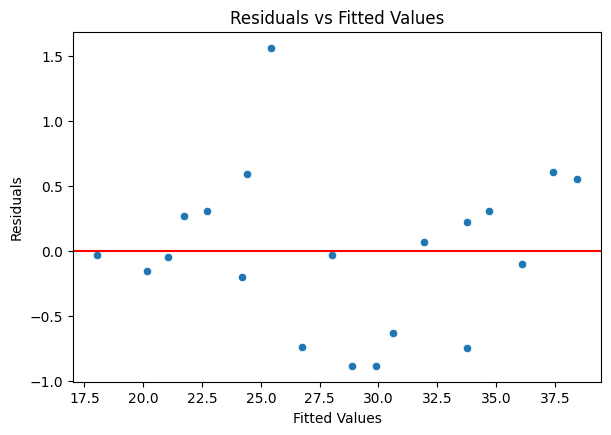

In [5]:
# 4. Plotting of residual values
residuals = model.resid
fitted_values = model.fittedvalues
plt.figure(figsize=(15, 10))
# Residuals vs Fitted Values
plt.subplot(2, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')


In [6]:
# 5. Hypothesis Testing for each predictor
alpha = 0.01
print(f"\nAt significance level α = {alpha}:")
for var_name, p_value in zip(['Engine_Size', 'Weight', 'Horsepower'], model.pvalues[1:]):
        if p_value < alpha:
            print(f"  {var_name} is statistically significant (p-value: {p_value:.4f} < {alpha})")
        else:
            print(f"  {var_name} is NOT statistically significant (p-value: {p_value:.4f} > {alpha})")
# (d and e) Show the results for different levels of significance.
significance_levels = [0.001, 0.05, 0.1]
print("Results for different significance levels:")
for alpha in significance_levels:
    print(f"\nAt significance level α = {alpha}:")
    for var_name, p_value in zip(['Engine_Size', 'Weight', 'Horsepower'], model.pvalues[1:]):
        if p_value < alpha:
            print(f"  {var_name} is statistically significant (p-value: {p_value:.4f} < {alpha})")
        else:
            print(f"  {var_name} is NOT statistically significant (p-value: {p_value:.4f} > {alpha})")


At significance level α = 0.01:
  Engine_Size is NOT statistically significant (p-value: 0.0542 > 0.01)
  Weight is statistically significant (p-value: 0.0000 < 0.01)
  Horsepower is NOT statistically significant (p-value: 0.3637 > 0.01)
Results for different significance levels:

At significance level α = 0.001:
  Engine_Size is NOT statistically significant (p-value: 0.0542 > 0.001)
  Weight is statistically significant (p-value: 0.0000 < 0.001)
  Horsepower is NOT statistically significant (p-value: 0.3637 > 0.001)

At significance level α = 0.05:
  Engine_Size is NOT statistically significant (p-value: 0.0542 > 0.05)
  Weight is statistically significant (p-value: 0.0000 < 0.05)
  Horsepower is NOT statistically significant (p-value: 0.3637 > 0.05)

At significance level α = 0.1:
  Engine_Size is statistically significant (p-value: 0.0542 < 0.1)
  Weight is statistically significant (p-value: 0.0000 < 0.1)
  Horsepower is NOT statistically significant (p-value: 0.3637 > 0.1)


In [7]:
# Create the dataset from the provided table
data = {
    'Father_Height': [60, 62, 64, 65, 66, 67, 68, 70, 72, 74],
    'Mother_Height': [61, 63, 63, 64, 65, 66, 66, 67, 68, 69],
    'Son_Height': [63.6, 65.2, 66.0, 65.5, 66.9, 67.1, 67.4, 68.3, 70.1, 70.0]
}
df = pd.DataFrame(data)

In [8]:
# (a) Fit multiple linear regression model
X = df[['Father_Height', 'Mother_Height']]
X = sm.add_constant(X)  # Add intercept
y = df['Son_Height']
model = sm.OLS(y, X).fit()
# Create regression equation
equation = f"Son's Height = {model.params[0]:.4f} + {model.params[1]:.4f} × Father's Height + {model.params[2]:.4f} × Mother's Height"
print(f"Regression Equation:")
print(equation)

Regression Equation:
Son's Height = 30.3171 + 0.3497 × Father's Height + 0.2045 × Mother's Height


<ipython-input-8-98ace71536e7>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"Son's Height = {model.params[0]:.4f} + {model.params[1]:.4f} × Father's Height + {model.params[2]:.4f} × Mother's Height"


In [9]:
print("Regression Summary:")
print(model.summary())

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             Son_Height   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     90.60
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.93e-06
Time:                        10:31:37   Log-Likelihood:                -4.4758
No. Observations:                  10   AIC:                             14.95
Df Residuals:                       7   BIC:                             15.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.3171  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [10]:
# (b) Interpret regression coefficients
print("Regression Coefficients:")
print(f"Intercept: {model.params[0]:.4f}")
print(f"Father's Height Coefficient: {model.params[1]:.4f}")
print(f"Mother's Height Coefficient: {model.params[2]:.4f}")
# (c) Test for regression toward the mean
# For Father's height coefficient
t_father = (model.params[1] - 1) / model.bse[1]
p_father = 1 - stats.t.cdf(t_father, df=model.df_resid)  # one-tailed test
print(t_father,p_father)
# For Mother's height coefficient
t_mother = (model.params[2] - 1) / model.bse[2]
p_mother = 1 - stats.t.cdf(t_mother, df=model.df_resid)  # one-tailed test
print(t_mother,p_mother)

Regression Coefficients:
Intercept: 30.3171
Father's Height Coefficient: 0.3497
Mother's Height Coefficient: 0.2045
-3.035453970003843 0.9905159459360942
-2.1135131295052187 0.9637940965990951


<ipython-input-10-60cc4a95a6a4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept: {model.params[0]:.4f}")
<ipython-input-10-60cc4a95a6a4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Father's Height Coefficient: {model.params[1]:.4f}")
<ipython-input-10-60cc4a95a6a4>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Mother's Height Coefficient: {model.params[2]:.4f}")
<ipython-input-10-60cc4a95a6

In [11]:
print(f"H0: Father's Height Coefficient < 1 vs H1: Father's Height Coefficient >= 1")
print(f"t-statistic: {t_father:.4f}, p-value: {p_father:.4f}")
print(f"H0: Mother's Height Coefficient < 1 vs H1: Mother's Height Coefficient >= 1")
print(f"t-statistic: {t_mother:.4f}, p-value: {p_mother:.4f}")

H0: Father's Height Coefficient < 1 vs H1: Father's Height Coefficient >= 1
t-statistic: -3.0355, p-value: 0.9905
H0: Mother's Height Coefficient < 1 vs H1: Mother's Height Coefficient >= 1
t-statistic: -2.1135, p-value: 0.9638


In [12]:
alpha = 0.05
if p_father < alpha:
    print(f"Reject H0 for Father's Height: Evidence that coefficient is less than 1 (p = {p_father:.4f})")
else:
    print(f"Cannot reject H0 for Father's Height: Insufficient evidence that coefficient is less than 1 (p = {p_father:.4f})")
if p_mother < alpha:
    print(f"Reject H0 for Mother's Height: Evidence that coefficient is less than 1 (p = {p_mother:.4f})")
else:
    print(f"Cannot reject H0 for Mother's Height: Insufficient evidence that coefficient is less than 1 (p = {p_mother:.4f})")

Cannot reject H0 for Father's Height: Insufficient evidence that coefficient is less than 1 (p = 0.9905)
Cannot reject H0 for Mother's Height: Insufficient evidence that coefficient is less than 1 (p = 0.9638)


Text(0, 0.5, 'Residuals')

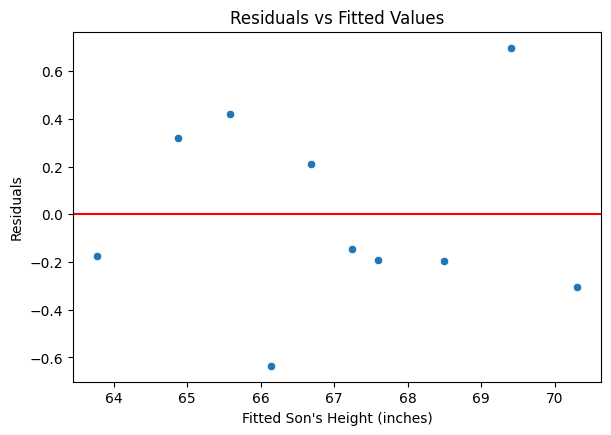

In [13]:
# (d) Plot residuals
residuals = model.resid
fitted_values = model.fittedvalues
# Residual plots
plt.figure(figsize=(15, 10))
# Residuals vs Fitted Values
plt.subplot(2, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Son\'s Height (inches)')
plt.ylabel('Residuals')


In [14]:
# (e) Comment on the implications of your results.
# Calculate average heights
avg_father = np.mean(df['Father_Height'])
avg_mother = np.mean(df['Mother_Height'])
avg_son = np.mean(df['Son_Height'])
# Short parents
short_father = 62
short_mother = 62
short_parents_prediction = model.params[0] + model.params[1] * short_father + model.params[2] * short_mother
print(f"For short parents (Father: {short_father}in, Mother: {short_mother}in):")
print(f"Predicted Son's Height: {short_parents_prediction:.2f} inches")
print(f"Difference from average son: {short_parents_prediction - avg_son:.2f} inches")


For short parents (Father: 62in, Mother: 62in):
Predicted Son's Height: 64.68 inches
Difference from average son: -2.33 inches


<ipython-input-14-b2c74f0a5b5d>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  short_parents_prediction = model.params[0] + model.params[1] * short_father + model.params[2] * short_mother


In [15]:
# Average parents
avg_parents_prediction = model.params[0] + model.params[1] * avg_father + model.params[2] * avg_mother
print(f"For average parents (Father: {avg_father:.2f}in, Mother: {avg_mother:.2f}in):")
print(f"Predicted Son's Height: {avg_parents_prediction:.2f} inches")
# Tall parents
tall_father = 72
tall_mother = 68
tall_parents_prediction = model.params[0] + model.params[1] * tall_father + model.params[2] * tall_mother
print(f"For tall parents (Father: {tall_father}in, Mother: {tall_mother}in):")
print(f"Predicted Son's Height: {tall_parents_prediction:.2f} inches")
print(f"Difference from average son: {tall_parents_prediction - avg_son:.2f} inches")

For average parents (Father: 66.80in, Mother: 65.20in):
Predicted Son's Height: 67.01 inches
For tall parents (Father: 72in, Mother: 68in):
Predicted Son's Height: 69.40 inches
Difference from average son: 2.39 inches


<ipython-input-15-6c14b714ec2a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_parents_prediction = model.params[0] + model.params[1] * avg_father + model.params[2] * avg_mother
<ipython-input-15-6c14b714ec2a>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tall_parents_prediction = model.params[0] + model.params[1] * tall_father + model.params[2] * tall_mother


In [16]:
# Calculate regression to the mean
print("Regression Toward the Mean Analysis:")
midpoint_height = (avg_father + avg_mother) / 2
print(f"Midpoint of average parent heights: {midpoint_height:.2f} inches")
# For each family, calculate how much closer the son is to the average compared to parents
print("\nFor each family, showing regression toward the mean:")
df['Parents_Avg'] = (df['Father_Height'] + df['Mother_Height']) / 2
df['Parents_Deviation'] = df['Parents_Avg'] - midpoint_height
df['Son_Deviation'] = df['Son_Height'] - avg_son
df['Regression_Ratio'] = df['Son_Deviation'] / df['Parents_Deviation']

print(df[['Father_Height', 'Mother_Height', 'Parents_Avg', 'Parents_Deviation',
          'Son_Height', 'Son_Deviation', 'Regression_Ratio']])

avg_regression_ratio = np.mean(df['Regression_Ratio'])
print(f"\nAverage Regression Ratio: {avg_regression_ratio:.4f}")
print(f"This means on average, a son's deviation from mean height is about {avg_regression_ratio:.2%} of their parents' deviation")

Regression Toward the Mean Analysis:
Midpoint of average parent heights: 66.00 inches

For each family, showing regression toward the mean:
   Father_Height  Mother_Height  Parents_Avg  Parents_Deviation  Son_Height  \
0             60             61         60.5               -5.5        63.6   
1             62             63         62.5               -3.5        65.2   
2             64             63         63.5               -2.5        66.0   
3             65             64         64.5               -1.5        65.5   
4             66             65         65.5               -0.5        66.9   
5             67             66         66.5                0.5        67.1   
6             68             66         67.0                1.0        67.4   
7             70             67         68.5                2.5        68.3   
8             72             68         70.0                4.0        70.1   
9             74             69         71.5                5.5       